In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as snb
%matplotlib inline

In [2]:
filename = 'C:\\Users\\richter Belmont\\Desktop\\Data Science - Projects\\Grupo Bimbo - Inventory Demand\\train.csv'
bimbo = pd.read_csv(filename, nrows=200000)

In [ ]:
filename = 'C:\\Users\\richter Belmont\\Desktop\\Data Science - Projects\\Grupo Bimbo - Inventory Demand\\train.csv'
n = sum(1 for line in open(filename)) - 1 # number of records that excludes header
s = 100000 #sample size
skip = sorted(random.sample(xrange(1,n+1),n-s)) # 0-indexed header won't be included in the list
bimbo = pd.read_csv(filename, skiprows=skip)

In [3]:
bimbo

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,4
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,4
3,3,1110,7,3301,15766,1240,4,33.52,0,0.0,4
4,3,1110,7,3301,15766,1242,3,22.92,0,0.0,3
5,3,1110,7,3301,15766,1250,5,38.20,0,0.0,5
6,3,1110,7,3301,15766,1309,3,20.28,0,0.0,3
7,3,1110,7,3301,15766,3894,6,56.10,0,0.0,6
8,3,1110,7,3301,15766,4085,4,24.60,0,0.0,4
9,3,1110,7,3301,15766,5310,6,31.68,0,0.0,6


In [4]:
bimbo.describe()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
count,200000.0,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,3.0,1112.486265,1.295345,1746.242090,1.235036e+06,16795.171395,8.660120,101.490249,0.180095,2.529336,8.521740
std,0.0,1.807890,1.281548,1042.523102,1.524237e+06,18066.625537,25.805526,425.918647,3.633853,40.780020,25.453302
min,3.0,1110.000000,1.000000,1.000000,1.407500e+04,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.0,1111.000000,1.000000,1083.000000,7.441400e+04,1220.000000,2.000000,19.940000,0.000000,0.000000,2.000000
50%,3.0,1112.000000,1.000000,1417.000000,4.601920e+05,3270.000000,4.000000,37.500000,0.000000,0.000000,4.000000
75%,3.0,1113.000000,1.000000,1640.000000,1.872817e+06,35144.000000,8.000000,74.830000,0.000000,0.000000,8.000000
max,3.0,1116.000000,11.000000,4501.000000,9.747286e+06,49994.000000,2000.000000,21736.560000,1008.000000,9426.000000,2000.000000


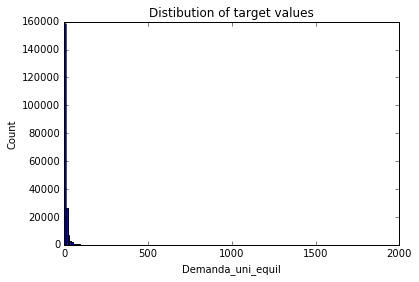

In [4]:
target = bimbo['Demanda_uni_equil'].tolist()

def label_plot(title, x, y):
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)

plt.hist(target, bins=200, color='blue')
label_plot('Distibution of target values', 'Demanda_uni_equil', 'Count')

In [6]:
print("Data with target values under 50:" + str(round(len(bimbo.loc[bimbo['Demanda_uni_equil'] <= 50]) / 5000, 2)) + '%')

Data with target values under 50:39.0%


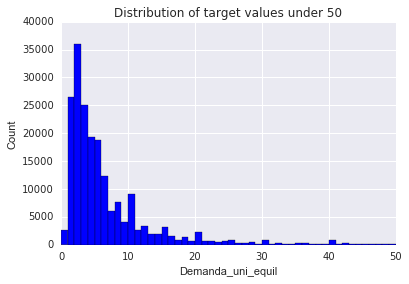

In [7]:
plt.hist(target, bins = 50, color='blue', range=(0,50))
label_plot('Distribution of target values under 50', 'Demanda_uni_equil', 'Count')
plt.show()

In [8]:
from collections import Counter
print(Counter(target).most_common(10))
print('Our most common value is 2')

sub = pd.read_csv('C:\\Users\\richter Belmont\\Desktop\\Data Science - Projects\Grupo Bimbo - Inventory Demand\\sample_submission.csv')
sub['Demanda_uni_equil'] = 2
sub.to_csv('mostcommon.csv', index=False)

[(2, 35898), (1, 26488), (3, 25009), (4, 19299), (5, 18812), (6, 12366), (10, 9059), (8, 7661), (7, 6091), (9, 4135)]
Our most common value is 2


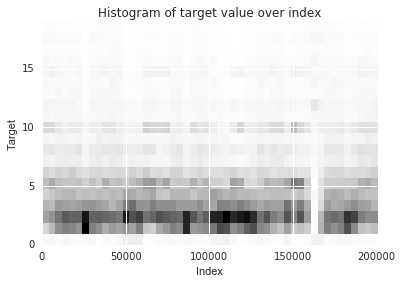

In [10]:
pseudo_time = bimbo.loc[bimbo.Demanda_uni_equil < 20].index.tolist()
target = bimbo.loc[bimbo.Demanda_uni_equil < 20].Demanda_uni_equil.tolist()

plt.hist2d(pseudo_time, target, bins=[50,20])
label_plot('Histogram of target value over index', 'Index', 'Target')

In [ ]:
week = bimbo['Semana']
print(week.value_counts())

demands = pd.read_csv(filename, usecols=['Semana', 'Demanda_uni_equil'])
print('Size:' + str(demands.shape))

In [5]:
test = pd.read_csv('C:\\Users\\richter Belmont\\Desktop\\Data Science - Projects\\Grupo Bimbo - Inventory Demand\\test.csv', nrows=1000000)

In [6]:
test

,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID
0,0,11,4037,1,2209,4639078,35305
1,1,11,2237,1,1226,4705135,1238
2,2,10,2045,1,2831,4549769,32940
3,3,11,1227,1,4448,4717855,43066
4,4,11,1219,1,1130,966351,1277
5,5,11,1146,4,6601,1741414,972
6,6,11,2057,1,4507,4659766,1232
7,7,10,1612,1,2837,4414012,35305
8,8,10,1349,1,1223,397854,1240
9,9,11,1461,1,1203,1646915,43203
